In [0]:
from sklearn.datasets import load_digits
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split
import keras
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l2
from keras import regularizers
from sklearn.model_selection import StratifiedShuffleSplit
from keras.datasets import fashion_mnist
import pandas as pd
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Dropout, BatchNormalization

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
num_classes = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

4423680/4422102 [==============================] - 0s 0us/step
60000 train samples
10000 test samples


In [0]:
X_train, X_train_val, y_train, y_train_val = train_test_split(X_train, y_train, test_size = 10000)

## Vanilla Model

In [0]:
model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [61]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 256)               200960    
_________________________________________________________________
activation_43 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 128)               32896     
_________________________________________________________________
activation_44 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 10)                1290      
_________________________________________________________________
activation_45 (Activation)   (None, 10)                0         
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_______________________________________________

In [62]:
es = EarlyStopping(monitor = 'val_loss', mode='min', min_delta = 0.0001, patience=15,restore_best_weights=True)
history_callback = model.fit(X_train,y_train,batch_size=64, epochs = 100, validation_data = (X_train_val,y_train_val), callbacks=[es])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 53us/step - loss: 0.5031 - accuracy: 0.8221 - val_loss: 0.4086 - val_accuracy: 0.8488
Epoch 2/100
50000/50000 [==============================] - 3s 52us/step - loss: 0.3674 - accuracy: 0.8662 - val_loss: 0.3693 - val_accuracy: 0.8655
Epoch 3/100
50000/50000 [==============================] - 3s 53us/step - loss: 0.3305 - accuracy: 0.8771 - val_loss: 0.3652 - val_accuracy: 0.8662
Epoch 4/100
50000/50000 [==============================] - 3s 51us/step - loss: 0.3051 - accuracy: 0.8875 - val_loss: 0.3556 - val_accuracy: 0.8729
Epoch 5/100
50000/50000 [==============================] - 3s 54us/step - loss: 0.2841 - accuracy: 0.8935 - val_loss: 0.3592 - val_accuracy: 0.8639
Epoch 6/100
50000/50000 [==============================] - 3s 51us/step - loss: 0.2745 - accuracy: 0.8983 - val_loss: 0.3649 - val_accuracy: 0.8670
Epoch 7/100
50000/50000 [==============================] - 3s 

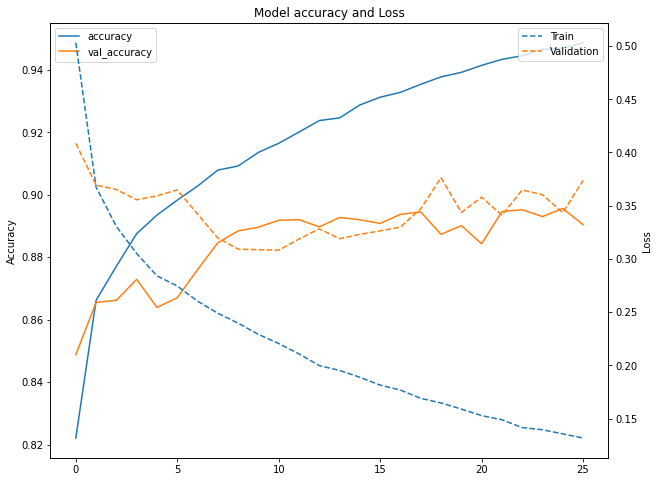

In [63]:
hc_df = pd.DataFrame(history_callback.history)
hc_df[['accuracy','val_accuracy']].plot(figsize=(10,8))
plt.title('Model accuracy and Loss')
plt.ylabel('Accuracy')
hc_df[['loss','val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [64]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test loss: 0.339
Test Accuracy: 0.888


The vanilla model obtains an accuracy of 88.8% on the test data with a loss of 0.339.

## Dropout

In [0]:
model_d = Sequential()
model_d.add(Dense(256, input_dim=784))
model_d.add(Dropout(0.5))
model_d.add(Activation('relu'))
model_d.add(Dense(128))
model_d.add(Dropout(0.5))
model_d.add(Activation('relu'))
model_d.add(Dense(10))
model_d.add(Activation('softmax'))
model_d.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [67]:
history_callback_d = model_d.fit(X_train,y_train,batch_size=64, epochs = 100, validation_data = (X_train_val,y_train_val), callbacks=[es])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 57us/step - loss: 0.7447 - accuracy: 0.7318 - val_loss: 0.4542 - val_accuracy: 0.8342
Epoch 2/100
50000/50000 [==============================] - 3s 52us/step - loss: 0.5221 - accuracy: 0.8146 - val_loss: 0.4034 - val_accuracy: 0.8523
Epoch 3/100
50000/50000 [==============================] - 3s 54us/step - loss: 0.4716 - accuracy: 0.8353 - val_loss: 0.3906 - val_accuracy: 0.8548
Epoch 4/100
50000/50000 [==============================] - 3s 54us/step - loss: 0.4484 - accuracy: 0.8395 - val_loss: 0.3843 - val_accuracy: 0.8599
Epoch 5/100
50000/50000 [==============================] - 3s 55us/step - loss: 0.4328 - accuracy: 0.8457 - val_loss: 0.3680 - val_accuracy: 0.8633
Epoch 6/100
50000/50000 [==============================] - 3s 53us/step - loss: 0.4177 - accuracy: 0.8509 - val_loss: 0.3609 - val_accuracy: 0.8628
Epoch 7/100
50000/50000 [==============================] - 3s 

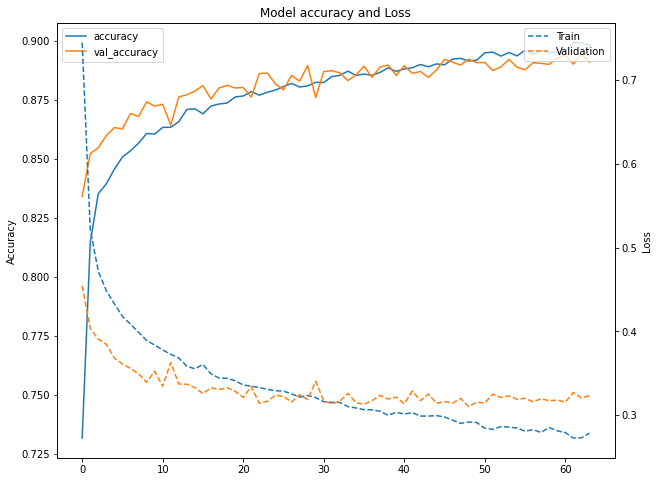

In [70]:
hc_df_d = pd.DataFrame(history_callback_d.history)
hc_df_d[['accuracy','val_accuracy']].plot(figsize=(10,8))
plt.title('Model accuracy and Loss')
plt.ylabel('Accuracy')
hc_df_d[['loss','val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [71]:
score_d = model_d.evaluate(X_test, y_test, verbose=0)
print("Test loss: {:.3f}".format(score_d[0]))
print("Test Accuracy: {:.3f}".format(score_d[1]))

Test loss: 0.326
Test Accuracy: 0.883


The model with dropouts obtains an accuracy of 88.3% and a loss of 0.326 on the test data, thus performing slightly worse than the similar sized vanilla network in terms of accuracy while having a better loss.

## Dropout - complex

In [0]:
model1 = Sequential()
model1.add(Dense(256, input_dim=784))
model1.add(Dropout(0.5))
model1.add(Activation('relu'))
model1.add(Dense(128))
model1.add(Dropout(0.5))
model1.add(Activation('relu'))
model1.add(Dense(128))
model1.add(Dropout(0.5))
model1.add(Activation('relu'))
model1.add(Dense(10))
model1.add(Activation('softmax'))
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
model1.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_21 (Dropout)         (None, 256)               0         
_________________________________________________________________
activation_36 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_22 (Dropout)         (None, 128)               0         
_________________________________________________________________
activation_37 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 128)             

In [37]:
history_callback_1 = model1.fit(X_train,y_train,batch_size=64, epochs = 100, validation_data = (X_train_val,y_train_val), callbacks=[es])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 63us/step - loss: 0.9032 - accuracy: 0.6650 - val_loss: 0.5181 - val_accuracy: 0.8075
Epoch 2/100
50000/50000 [==============================] - 3s 61us/step - loss: 0.5953 - accuracy: 0.7919 - val_loss: 0.4508 - val_accuracy: 0.8368
Epoch 3/100
50000/50000 [==============================] - 3s 58us/step - loss: 0.5355 - accuracy: 0.8156 - val_loss: 0.4186 - val_accuracy: 0.8444
Epoch 4/100
50000/50000 [==============================] - 3s 58us/step - loss: 0.5014 - accuracy: 0.8251 - val_loss: 0.4126 - val_accuracy: 0.8429
Epoch 5/100
50000/50000 [==============================] - 3s 60us/step - loss: 0.4787 - accuracy: 0.8328 - val_loss: 0.3869 - val_accuracy: 0.8564
Epoch 6/100
50000/50000 [==============================] - 3s 61us/step - loss: 0.4675 - accuracy: 0.8373 - val_loss: 0.3862 - val_accuracy: 0.8564
Epoch 7/100
50000/50000 [==============================] - 3s 

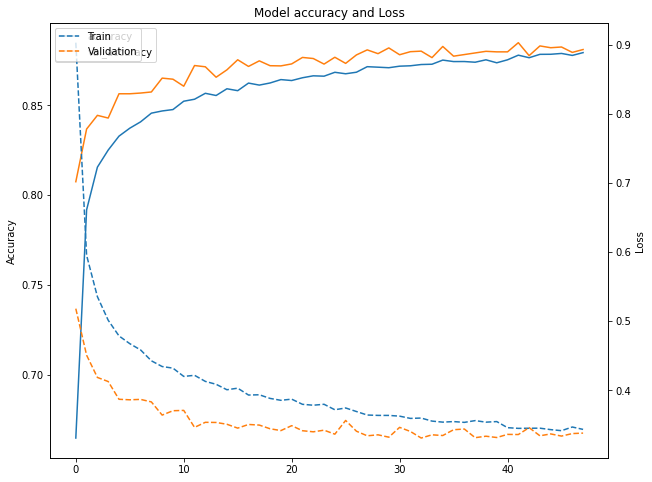

In [38]:
hc_df_1 = pd.DataFrame(history_callback_1.history)
hc_df_1[['accuracy','val_accuracy']].plot(figsize=(10,8))
plt.title('Model accuracy and Loss')
plt.ylabel('Accuracy')
hc_df_1[['loss','val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [45]:
score1 = model1.evaluate(X_test, y_test, verbose=0)
print("Test loss: {:.3f}".format(score1[0]))
print("Test Accuracy: {:.3f}".format(score1[1]))

Test loss: 0.346
Test Accuracy: 0.879


The complex model with dropouts obtains an accuracy of 87.9% on the test data and a loss of 0.346, thus performing slightly worse than the smaller vanilla network. Hence, using dropouts allows us to build a more complex network with roughly the same performance.

## Dropout + Batch Normalization

In [0]:
model2 = Sequential()
model2.add(Dense(256, input_dim=784))
model2.add(Dropout(0.5))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dense(128))
model2.add(Dropout(0.5))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dense(128))
model2.add(Dropout(0.5))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dense(10))
model2.add(Activation('softmax'))
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [49]:
model2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_18 (Dropout)         (None, 256)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
activation_32 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)              

In [50]:
history_callback_2 = model2.fit(X_train,y_train,batch_size=64, epochs = 100, validation_data = (X_train_val,y_train_val), callbacks=[es])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 6s 114us/step - loss: 0.8546 - accuracy: 0.7042 - val_loss: 0.4963 - val_accuracy: 0.8171
Epoch 2/100
50000/50000 [==============================] - 5s 101us/step - loss: 0.5698 - accuracy: 0.8009 - val_loss: 0.4461 - val_accuracy: 0.8326
Epoch 3/100
50000/50000 [==============================] - 5s 103us/step - loss: 0.5199 - accuracy: 0.8194 - val_loss: 0.4307 - val_accuracy: 0.8418
Epoch 4/100
50000/50000 [==============================] - 5s 102us/step - loss: 0.4871 - accuracy: 0.8284 - val_loss: 0.4653 - val_accuracy: 0.8369
Epoch 5/100
50000/50000 [==============================] - 5s 103us/step - loss: 0.4652 - accuracy: 0.8382 - val_loss: 0.4268 - val_accuracy: 0.8472
Epoch 6/100
50000/50000 [==============================] - 5s 104us/step - loss: 0.4493 - accuracy: 0.8419 - val_loss: 0.3854 - val_accuracy: 0.8594
Epoch 7/100
50000/50000 [==============================]

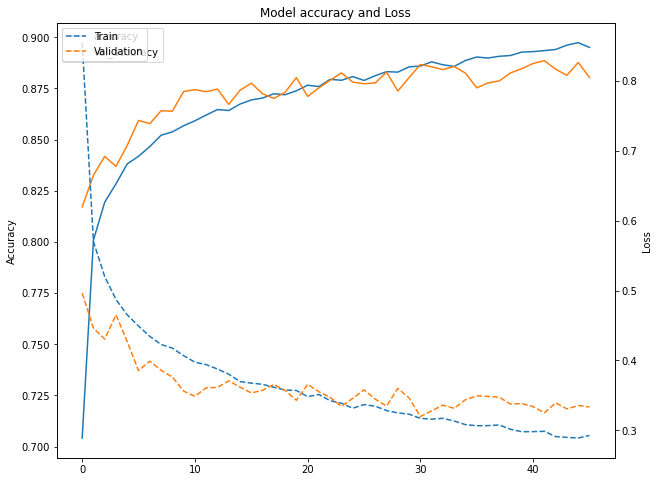

In [51]:
hc_df_2 = pd.DataFrame(history_callback_2.history)
hc_df_2[['accuracy','val_accuracy']].plot(figsize=(10,8))
plt.title('Model accuracy and Loss')
plt.ylabel('Accuracy')
hc_df_2[['loss','val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [52]:
score2 = model2.evaluate(X_test, y_test, verbose=0)
print("Test loss: {:.3f}".format(score2[0]))
print("Test Accuracy: {:.3f}".format(score2[1]))

Test loss: 0.350
Test Accuracy: 0.880


The complex model with dropouts and batch normalization obtains an accuracy of 88% on the test data and a loss of 0.35, thus performing slightly worse than the other 3 models. This model too allows us to learn a complex network on the dataset.

### Results

Vanilla Network - Test Accuracy - 88.8% Test Loss - 0.339

Vanilla Network with dropouts - Test Accuracy - 88.3% Test Loss - 0.326

Complex Network with dropouts - Test Accuracy - 87.9% Test Loss - 0.346

Complex Network with dropouts + batch normalization - Test Accuracy - 88% Test Loss - 0.35